In [18]:
from collections import Counter
import os
import glob
import pandas as pd
import re
folder = input("Please, input your folder with files, example - C:\\Users\\nlebe\\test_data")
os.chdir(folder)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
# reading csv file
text = open("combined_csv.csv", "r", encoding='utf-8-sig')
  
# joining with space content of text
text = ' '.join([i for i in text])  
  
text = text.replace(",", " ")  
text = text.lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text)
  
Counter = Counter(match_pattern)  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(10)
  
print(most_occur) 

Please, input your folder with files, example - C:\Users\nlebe\test_dataC:\\Users\\nlebe\\test_data
[('tinder', 589658), ('the', 316787), ('and', 270022), ('app', 236406), ('raw', 186375), ('you', 160183), ('ply', 153987), ('single', 150886), ('for', 142568), ('this', 120475)]


<AxesSubplot:xlabel='VALUE'>

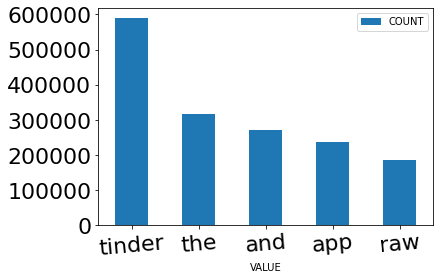

In [19]:

df = pd.DataFrame(most_occur, columns = ["VALUE", "COUNT"])
df["COUNT"]=df["COUNT"].astype(float)
top_5 = df.sort_values(by="COUNT", ascending=False).head()
top_5.plot(x="VALUE", y="COUNT", kind="bar", rot=5, fontsize=22)
